In [1]:
using Plots, Images, FileIO, FixedPointNumbers, ColorSchemes, ColorSchemeTools

In [2]:
function filter_RGB(rgb::RGB{N0f8}, f::RGB{N0f8})
    r = rgb.r * f.r
    g = rgb.g * f.g
    b = rgb.b * f.b
    return RGB{N0f8}(r, g, b)
end

function filter_RGB(rgb::RGB{N0f8}, f::HSV{Float32})
    f = convert(RGB, f)
    r = rgb.r * f.r
    g = rgb.g * f.g
    b = rgb.b * f.b
    return RGB{N0f8}(r, g, b)
end

function filter_RGB(rgb::RGB{N0f8}, f::String)
    if !haskey(Colors.color_names, f)
        error("$f is not a valid name for a color")
        return
    end
    f = Colors.color_names[f]
    f = RGB{N0f8}(f[1]/255,f[2]/255,f[3]/255)
    r = rgb.r * f.r
    g = rgb.g * f.g
    b = rgb.b * f.b
    return RGB{N0f8}(r, g, b)
end


filter_RGB (generic function with 3 methods)

In [11]:
bar = load("./data/barbara_color.png")
van = load("./data/VanGogh.jpg")

red_bar = filter_RGB.(bar, RGB{N0f8}(1,0,0))
green_bar = filter_RGB.(bar, convert(HSV, RGB{N0f8}(0,1,0)))
blue_bar = filter_RGB.(bar, "blue")

red_van = filter_RGB.(van, RGB{N0f8}(1,0,0))
green_van = filter_RGB.(van, convert(HSV, RGB{N0f8}(0,1,0)))
blue_van = filter_RGB.(van, "blue")

""

""

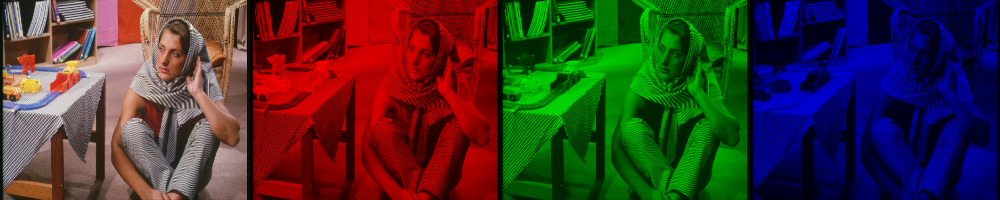

In [13]:
mosaic(bar, red_bar, green_bar, blue_bar; nrow=1)

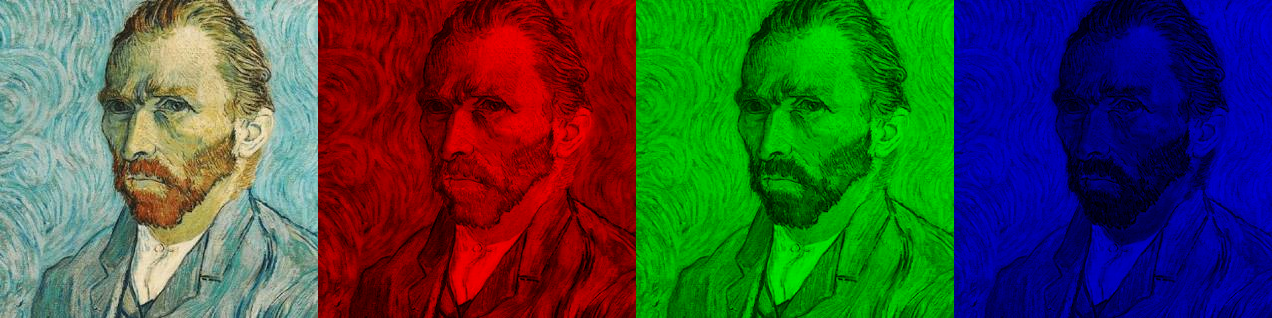

In [14]:
mosaic(van, red_van, green_van, blue_van; nrow=1)

In [18]:
function pseudo_color(gray::Gray{N0f8}, f::RGB{N0f8})
    gray = convert(RGB, gray)
    r = gray.r * f.r
    g = gray.g * f.g
    b = gray.b * f.b
    return RGB{N0f8}(r, g, b)
end

function pseudo_color(gray::Gray{N0f8}, f::HSV{Float32})
    gray = convert(RGB, gray)
    f = convert(RGB, f)
    r = gray.r * f.r
    g = gray.g * f.g
    b = gray.b * f.b
    return RGB{N0f8}(r, g, b)
end

function pseudo_color(gray::Gray{N0f8}, f::String)
    if !haskey(Colors.color_names, f)
        error("$f is not a valid name for a color")
        return
    end
    gray = convert(RGB, gray)
    f = Colors.color_names[f]
    f = RGB{N0f8}(f[1]/255,f[2]/255,f[3]/255)
    r = gray.r * f.r
    g = gray.g * f.g
    b = gray.b * f.b
    return RGB{N0f8}(r, g, b)
end


pseudo_color (generic function with 3 methods)

In [25]:
cam = load("./data/cameraman_gray.png")
lena = load("./data/lena_gray.png")

c_cam = pseudo_color.(cam, "orange")
c_lena = pseudo_color.(lena, "magenta")

""

""

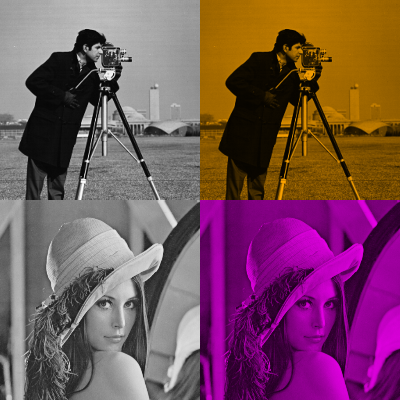

In [26]:
mosaic(cam, lena, c_cam, c_lena; nrow=2, ncol=2)

In [16]:
colorschemes[:vangogh].notes

"from artist Vincent Van Gogh's painting The Starry Night, painted in June, 1889, depicting the view from the east-facing window of his asylum room at Saint-Rémy-de-Provence."

In [74]:
colorschemes[:vangogh]

In [75]:
starry = sortcolorscheme(extract("./data/StarryNight.jpg", 30, 15))

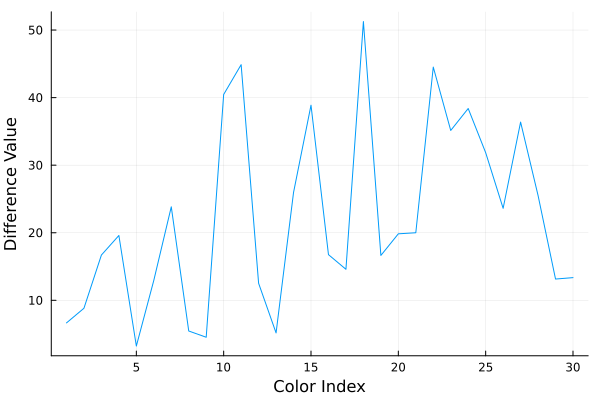

In [76]:
d = []
for i = 1:30
    append!(d, colordiff(starry[i], colorschemes[:vangogh][i]))
end

p = plot(d, label="")
xlabel!("Color Index")
ylabel!("Difference Value")
savefig("Colordiff.png")

p

In [77]:
function mandelbrot(x, y)
    z = c = x + y*im
    for i in 1:100.0 
        abs(z) > 2 && return i 
        z = z^2 + c; 
    end; 
    0
end

mandelbrot (generic function with 1 method)

In [90]:
x = LinRange(-2, 1, 1000)
y = LinRange(-1, 1, 1000)
matrix = mandelbrot.(x, y');

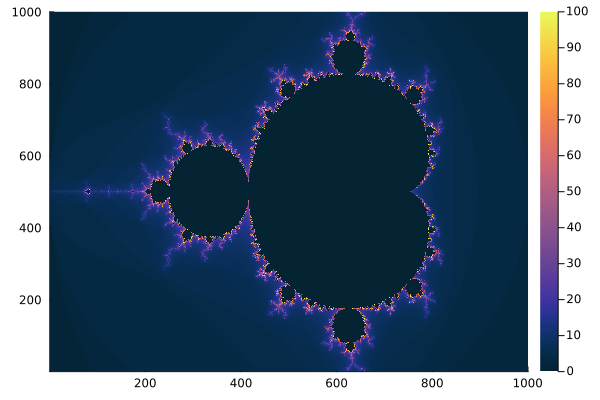

In [91]:
heatmap(1:size(matrix,2),1:size(matrix,1), matrix', color = :thermal)

In [99]:
x = LinRange(.25, .5, 1000)
y = LinRange(.25, .5, 1000)
matrix = mandelbrot.(x, y');

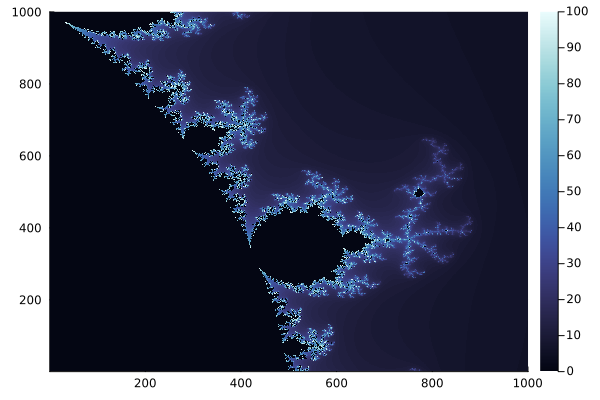

In [103]:
heatmap(1:size(matrix,2),1:size(matrix,1), matrix', color = :ice)

In [131]:
x = LinRange(-1.5, -.75, 1000)
y = LinRange(-.5, 0, 1000)
matrix = mandelbrot.(x, y');

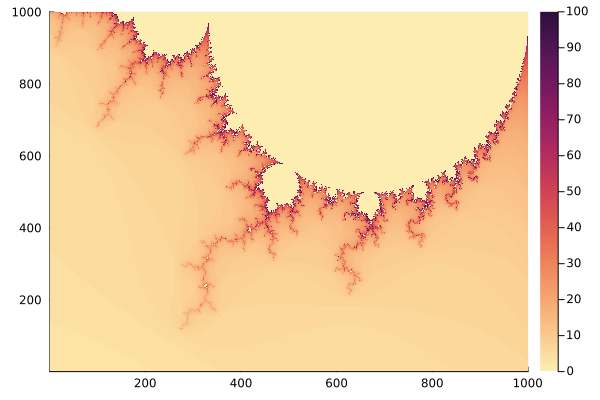

In [132]:
heatmap(1:size(matrix,2),1:size(matrix,1), matrix', color = :matter)

In [176]:
x = LinRange(.3, .4, 1000)
y = LinRange(-.15, -0.025, 1000)
matrix = mandelbrot.(x, y');

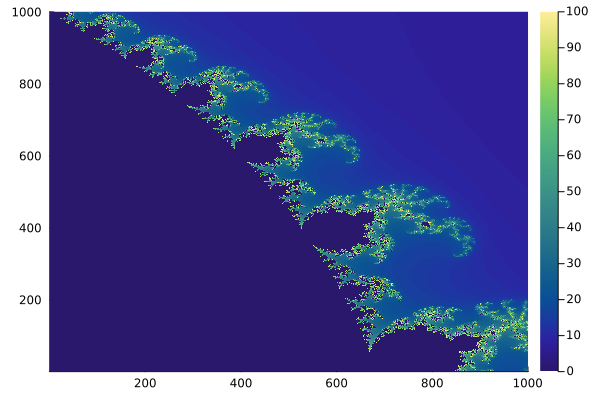

In [177]:
heatmap(1:size(matrix,2),1:size(matrix,1), matrix', color = :haline)